In [1]:
import texfig
import tensorly as tl

import nilearn

from nilearn import image
import nibabel as nib
import copy
from nilearn import plotting
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
from math import ceil
from nilearn.datasets import MNI152_FILE_PATH
from sklearn.model_selection import train_test_split
from nibabel.affines import apply_affine
from nilearn.image.resampling import coord_transform, get_bounds, get_mask_bounds
from nilearn.image import resample_img
from nilearn.masking import compute_background_mask
from datetime import datetime
import file_service as fs
import csv

import metric_util as mt
import data_util as du
import mri_draw_utils as mrd
import configparser
from os import path
import logging
import metadata as mdt
import tensor_util as tu
import tucker_tensor_completion as ct

import numpy as np

# Import PyTorch
import torch
from torch.autograd import Variable

# Import TensorLy
import tensorly as tl
from tensorly.tucker_tensor import tucker_to_tensor
from tensorly.random import check_random_state

from tensorly.decomposition import parafac
from tensorly.kruskal_tensor import kruskal_to_tensor, KruskalTensor

%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
tl.set_backend('pytorch')

In [3]:
subject_scan_path = du.get_full_path_subject1()

In [4]:
x_true_img = mt.read_image_abs_path(subject_scan_path)
x_true_data = np.array(x_true_img.get_data())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [5]:
ground_truth, norm_ground_truth = tu.normalize_data(x_true_data)
print("Norm Ground Truth: " + str(norm_ground_truth))
ground_truth_tensor = tl.tensor(ground_truth)

Norm Ground Truth: 74896790.0


In [6]:
kruskal, error_history = parafac(ground_truth_tensor, 10, n_iter_max=1000, init='random', l2_reg = 0.01, normalize_factors=True, orthogonalise=True, tol=1e-8, random_state=42, verbose=1, return_errors=True, cvg_criterion='abs_rec_error')

reconstruction error=0.26736724376678467
iteration 1,  reconstraction error: 0.29648494720458984, decrease = -0.029117703437805176, unnormalized = 0.29548561573028564
iteration 2,  reconstraction error: 0.1338731348514557, decrease = 0.16261181235313416, unnormalized = 0.1334218978881836
iteration 3,  reconstraction error: 0.07052648067474365, decrease = 0.06334665417671204, unnormalized = 0.0702887624502182
iteration 4,  reconstraction error: 0.06080890819430351, decrease = 0.00971757248044014, unnormalized = 0.060603946447372437
iteration 5,  reconstraction error: 0.05663226917386055, decrease = 0.004176639020442963, unnormalized = 0.05644138529896736
iteration 6,  reconstraction error: 0.053486865013837814, decrease = 0.0031454041600227356, unnormalized = 0.05330658331513405
iteration 7,  reconstraction error: 0.05065770447254181, decrease = 0.0028291605412960052, unnormalized = 0.050486959517002106
iteration 8,  reconstraction error: 0.047915808856487274, decrease = 0.0027418956160

iteration 65,  reconstraction error: 0.0262125376611948, decrease = 9.141489863395691e-05, unnormalized = 0.02612418681383133
iteration 66,  reconstraction error: 0.026123104616999626, decrease = 8.943304419517517e-05, unnormalized = 0.02603505365550518
iteration 67,  reconstraction error: 0.02602183260023594, decrease = 0.00010127201676368713, unnormalized = 0.02593412436544895
iteration 68,  reconstraction error: 0.025945620611310005, decrease = 7.621198892593384e-05, unnormalized = 0.025858169421553612
iteration 69,  reconstraction error: 0.025859903544187546, decrease = 8.571706712245941e-05, unnormalized = 0.025772741064429283
iteration 70,  reconstraction error: 0.02578321099281311, decrease = 7.669255137443542e-05, unnormalized = 0.02569630742073059
iteration 71,  reconstraction error: 0.02570395916700363, decrease = 7.925182580947876e-05, unnormalized = 0.025617321953177452
iteration 72,  reconstraction error: 0.025629142299294472, decrease = 7.481686770915985e-05, unnormalized

iteration 129,  reconstraction error: 0.02353462018072605, decrease = 1.7842277884483337e-05, unnormalized = 0.023455295711755753
iteration 130,  reconstraction error: 0.023516764864325523, decrease = 1.7855316400527954e-05, unnormalized = 0.0234375
iteration 131,  reconstraction error: 0.023496342822909355, decrease = 2.0422041416168213e-05, unnormalized = 0.023417146876454353
iteration 132,  reconstraction error: 0.02347845770418644, decrease = 1.788511872291565e-05, unnormalized = 0.023399321362376213
iteration 133,  reconstraction error: 0.02346055954694748, decrease = 1.7898157238960266e-05, unnormalized = 0.023381484672427177
iteration 134,  reconstraction error: 0.02344776690006256, decrease = 1.2792646884918213e-05, unnormalized = 0.02336873486638069
iteration 135,  reconstraction error: 0.023427283391356468, decrease = 2.0483508706092834e-05, unnormalized = 0.02334832027554512
iteration 136,  reconstraction error: 0.02340422011911869, decrease = 2.306327223777771e-05, unnormal

iteration 193,  reconstraction error: 0.022336306050419807, decrease = 1.611374318599701e-05, unnormalized = 0.02226101979613304
iteration 194,  reconstraction error: 0.022328244522213936, decrease = 8.061528205871582e-06, unnormalized = 0.022252986207604408
iteration 195,  reconstraction error: 0.022304045036435127, decrease = 2.4199485778808594e-05, unnormalized = 0.022228866815567017
iteration 196,  reconstraction error: 0.022290587425231934, decrease = 1.3457611203193665e-05, unnormalized = 0.022215455770492554
iteration 197,  reconstraction error: 0.02227981761097908, decrease = 1.0769814252853394e-05, unnormalized = 0.022204721346497536
iteration 198,  reconstraction error: 0.022252866998314857, decrease = 2.6950612664222717e-05, unnormalized = 0.022177862003445625
iteration 199,  reconstraction error: 0.022252866998314857, decrease = 0.0, unnormalized = 0.022177862003445625
PARAFAC converged after 199 iterations


In [7]:
kruskal.weights

tensor([0.2637, 0.2059, 0.1560, 0.2681, 0.1009, 0.1178, 0.2454, 0.2113, 0.2543,
        0.1029])

In [14]:
error_history 

[tensor(0.2674),
 tensor(0.2965),
 tensor(0.1339),
 tensor(0.0705),
 tensor(0.0608),
 tensor(0.0566),
 tensor(0.0535),
 tensor(0.0507),
 tensor(0.0479),
 tensor(0.0451),
 tensor(0.0424),
 tensor(0.0398),
 tensor(0.0375),
 tensor(0.0356),
 tensor(0.0341),
 tensor(0.0330),
 tensor(0.0322),
 tensor(0.0316),
 tensor(0.0312),
 tensor(0.0309),
 tensor(0.0306),
 tensor(0.0305),
 tensor(0.0304),
 tensor(0.0302),
 tensor(0.0302),
 tensor(0.0301),
 tensor(0.0300),
 tensor(0.0300),
 tensor(0.0299),
 tensor(0.0299),
 tensor(0.0298),
 tensor(0.0298),
 tensor(0.0297),
 tensor(0.0297),
 tensor(0.0296),
 tensor(0.0296),
 tensor(0.0295),
 tensor(0.0294),
 tensor(0.0294),
 tensor(0.0293),
 tensor(0.0292),
 tensor(0.0292),
 tensor(0.0291),
 tensor(0.0290),
 tensor(0.0289),
 tensor(0.0288),
 tensor(0.0287),
 tensor(0.0286),
 tensor(0.0285),
 tensor(0.0283),
 tensor(0.0282),
 tensor(0.0280),
 tensor(0.0279),
 tensor(0.0277),
 tensor(0.0276),
 tensor(0.0274),
 tensor(0.0273),
 tensor(0.0271),
 tensor(0.0270

In [15]:
t = kruskal_to_tensor(KruskalTensor((kruskal.weights, kruskal.factors)))

In [16]:
approx_error = tl.norm(t - ground_truth_tensor, 'fro')/tl.norm(ground_truth_tensor, 'fro')

In [17]:
approx_error

tensor(0.0884)

In [12]:
x_hat_img = mt.reconstruct_image_affine(x_true_img, np.array(t.data))
        

In [13]:
x_hat

NameError: name 'x_hat' is not defined

In [18]:
from nilearn.plotting import plot_prob_atlas

/usr/local/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


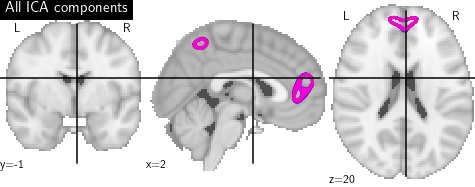

In [19]:
plot_prob_atlas(x_hat_img, title='All ICA components')

In [ ]:
plt.show()

/usr/local/lib/python3.7/site-packages/nilearn/plotting/displays.py:1596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])
/usr/local/lib/python3.7/site-packages/nilearn/plotting/displays.py:602: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


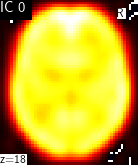

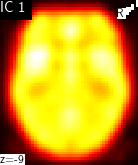

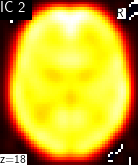

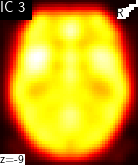

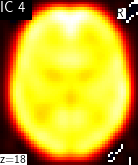

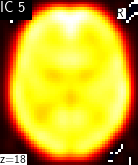

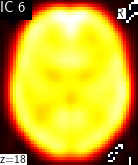

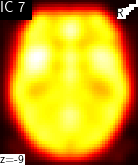

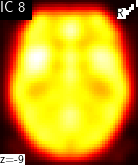

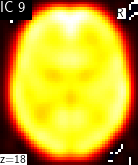

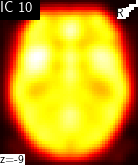

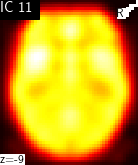

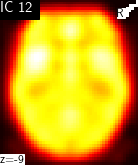

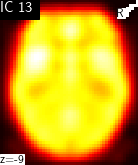

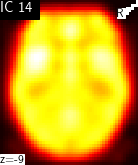

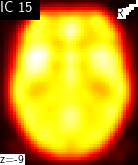

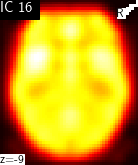

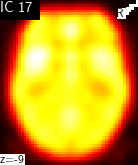

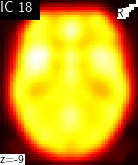

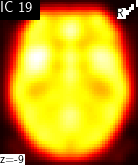

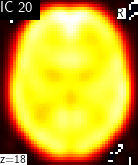

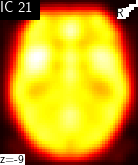

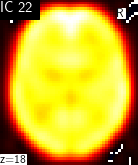

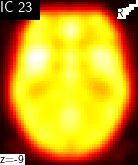

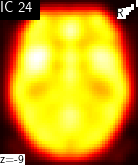

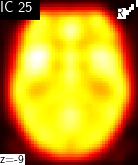

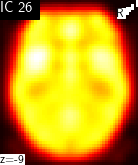

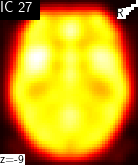

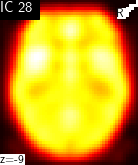

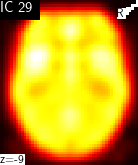

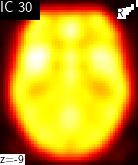

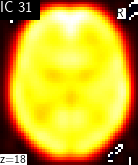

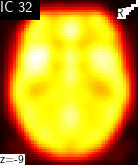

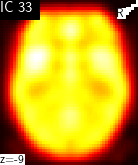

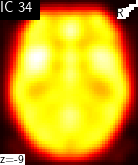

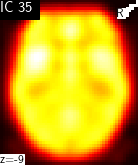

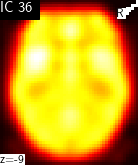

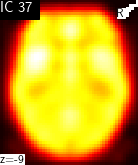

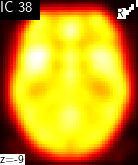

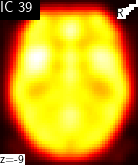

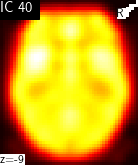

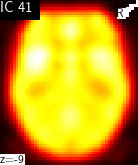

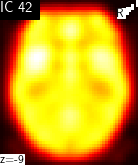

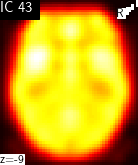

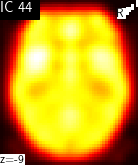

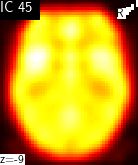

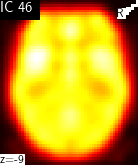

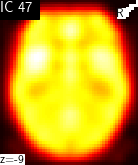

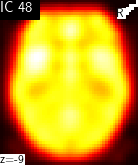

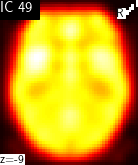

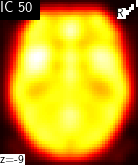

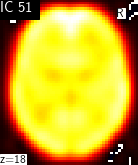

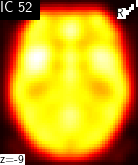

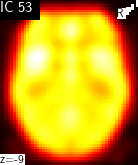

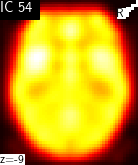

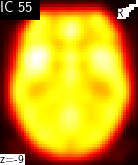

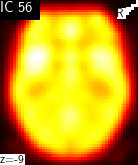

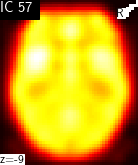

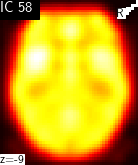

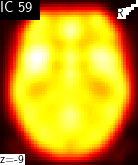

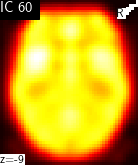

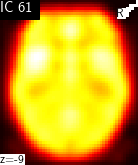

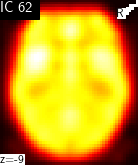

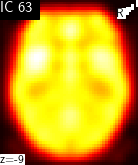

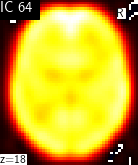

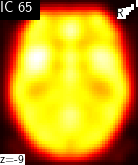

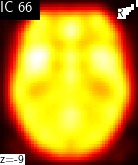

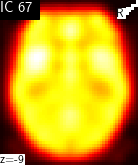

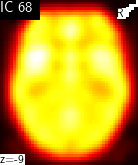

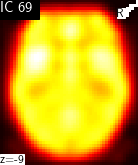

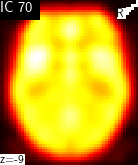

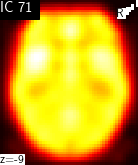

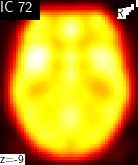

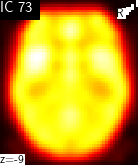

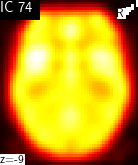

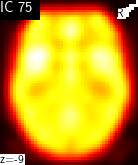

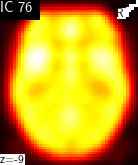

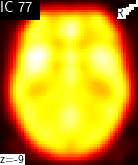

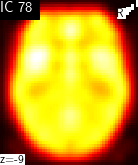

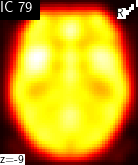

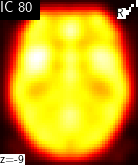

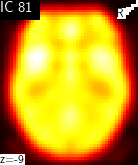

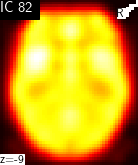

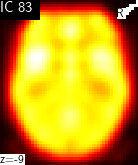

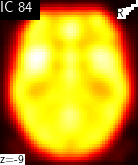

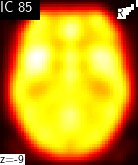

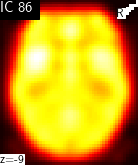

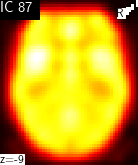

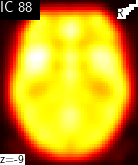

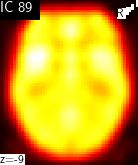

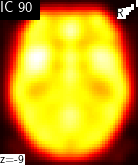

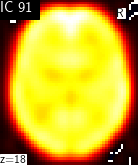

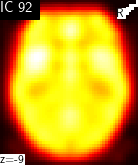

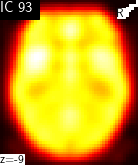

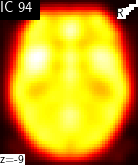

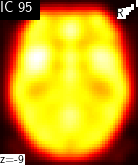

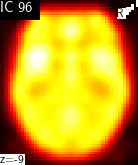

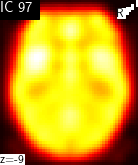

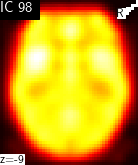

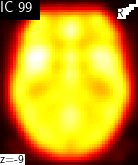

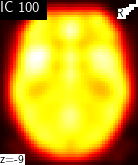

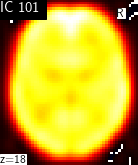

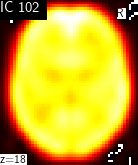

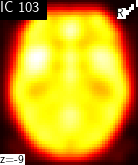

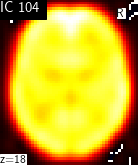

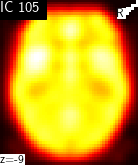

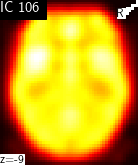

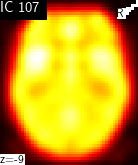

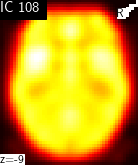

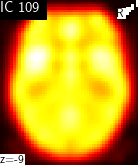

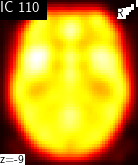

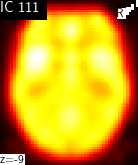

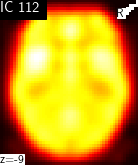

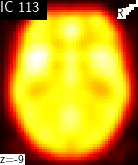

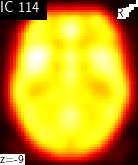

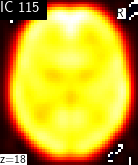

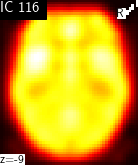

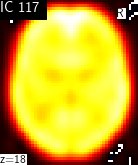

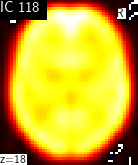

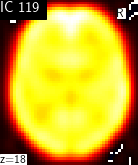

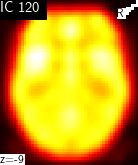

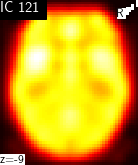

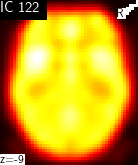

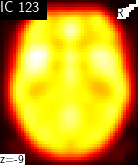

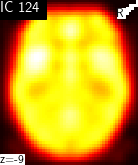

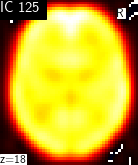

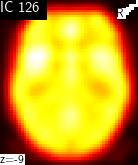

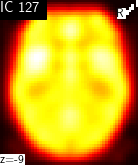

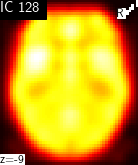

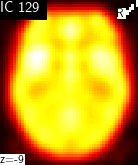

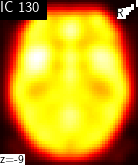

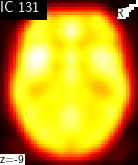

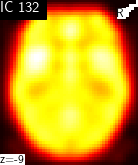

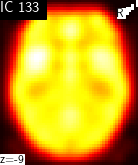

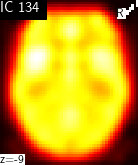

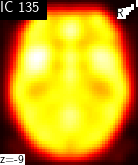

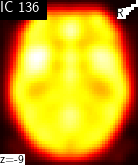

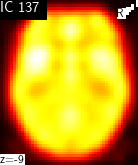

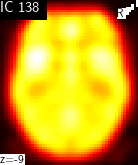

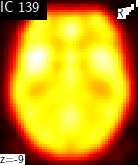

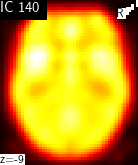

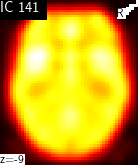

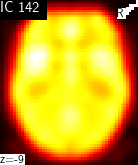

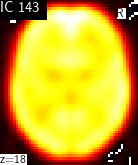

In [20]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(x_hat_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

In [22]:
original_shape = ground_truth.shape
target_shape = mt.get_target_shape(ground_truth, 2)


In [23]:
target_shape

(153594, 144)

In [26]:
x2d = mt.reshape_as_nD(ground_truth, 2, target_shape )

Reshape Required. D = 2; Target Shape: (153594, 144)
Resulted Target Shape: (153594, 144)


In [39]:
"""Perform tangent PCA at the mean on SO(3)."""

import logging

import matplotlib.pyplot as plt
import numpy as np

import geomstats.visualization as visualization
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

SO3_GROUP = SpecialOrthogonal(n=145)
METRIC = SO3_GROUP.bi_invariant_metric

N_SAMPLES = 153594
N_COMPONENTS = 144

In [40]:
mean = FrechetMean(metric=METRIC)
mean.fit(x2d)

mean_estimate = mean.estimate_

tpca = TangentPCA(metric=METRIC, n_components=N_COMPONENTS)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(x2d)

AssertionError: 

In [42]:
import logging
import os

import matplotlib.pyplot as plt

import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.learning.agglomerative_hierarchical_clustering \
import AgglomerativeHierarchicalClustering

In [51]:
sphere = Hypersphere(dim=143)
sphere_distance = sphere.metric.dist

In [ ]:
clustering = AgglomerativeHierarchicalClustering(
        n_clusters=10,
        distance=sphere_distance)

clustering.fit(x2d)

clustering_labels = clustering.labels_

In [46]:
x2d

array([[7.5167009e-06, 7.0531205e-06, 6.9163862e-06, ..., 6.5815334e-06,
        6.5462650e-06, 6.5292506e-06],
       [8.0636928e-06, 7.5904313e-06, 7.4099557e-06, ..., 7.3443798e-06,
        7.3235415e-06, 7.2265557e-06],
       [9.3764929e-06, 9.0290841e-06, 8.8073502e-06, ..., 9.0567401e-06,
        9.0723297e-06, 8.9292271e-06],
       ...,
       [1.8616636e-06, 1.8141118e-06, 1.6781875e-06, ..., 1.6349003e-06,
        1.6369823e-06, 1.7370068e-06],
       [1.9530564e-06, 1.7429932e-06, 1.6838127e-06, ..., 1.6033147e-06,
        1.6160433e-06, 1.7495238e-06],
       [2.0076041e-06, 1.6791940e-06, 1.6815344e-06, ..., 1.5794943e-06,
        1.6046246e-06, 1.7521330e-06]], dtype=float32)